In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("breast-cancer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.head()
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
# Printing categorical and continous columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['diagnosis']
Continuous Columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [18]:
# Encoding target if not numeric

from sklearn.preprocessing import LabelEncoder
if df['diagnosis'].dtype == 'object':
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])

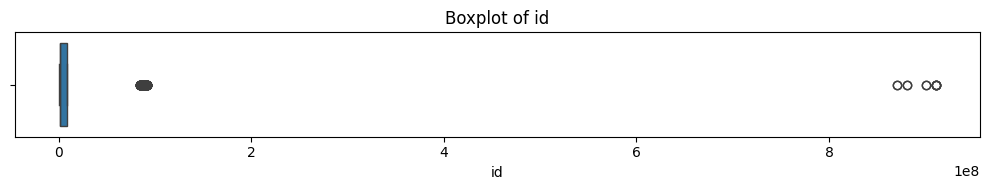

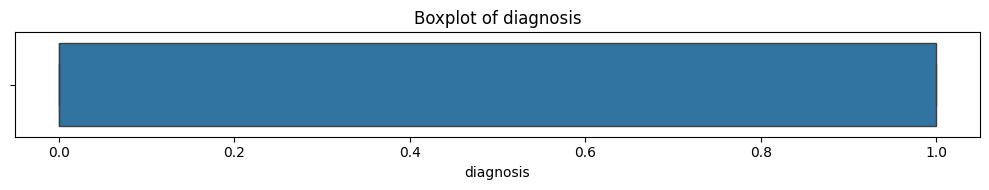

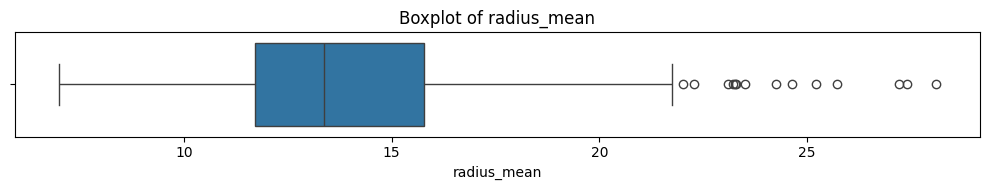

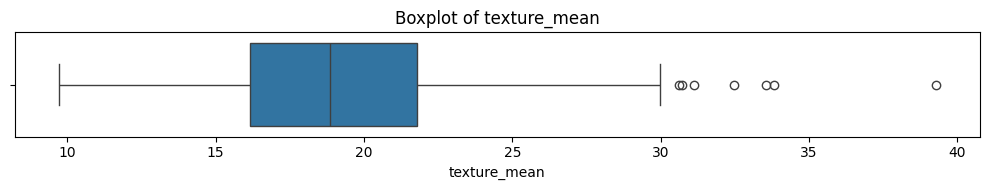

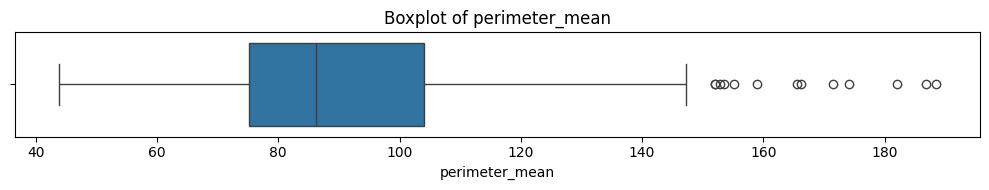

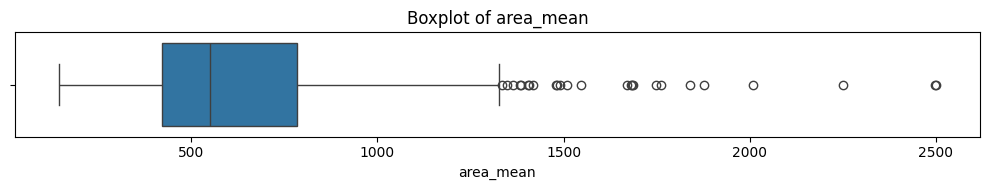

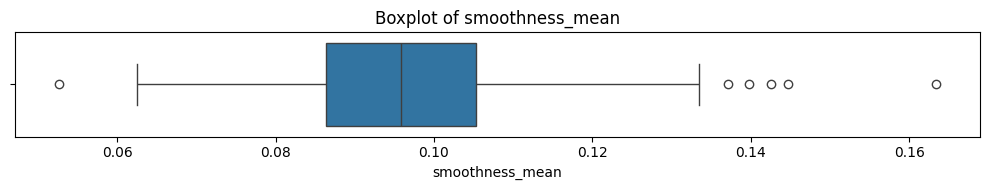

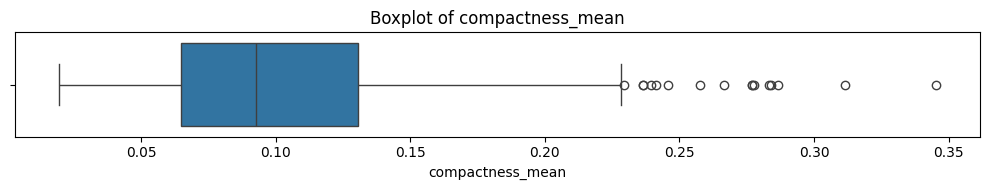

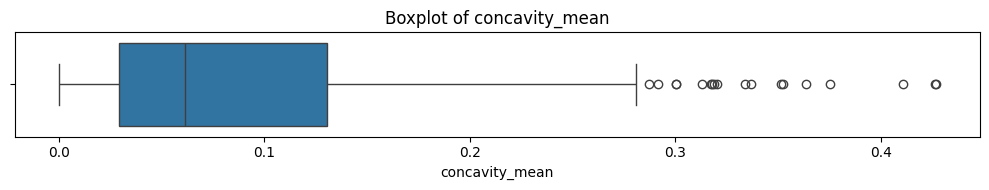

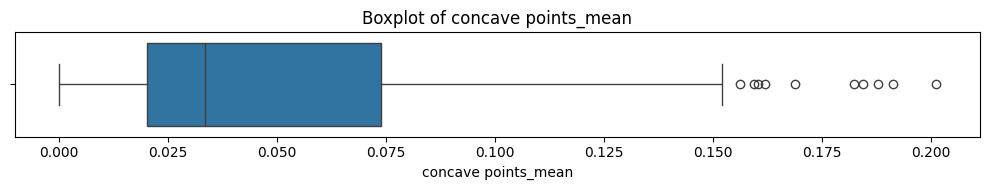

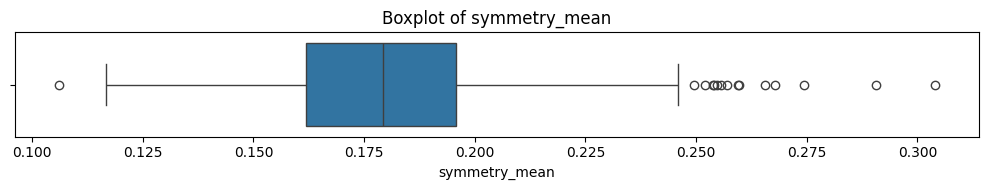

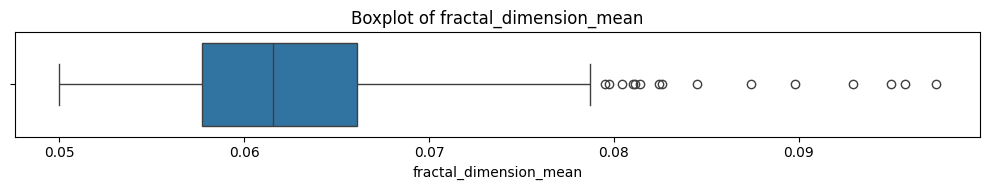

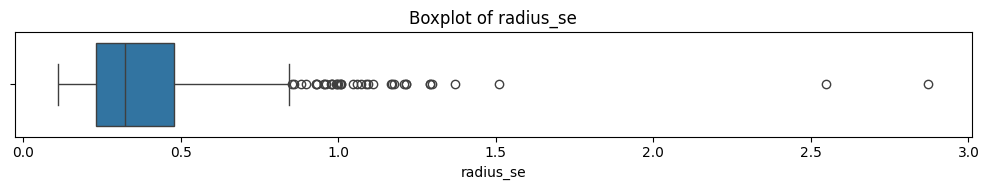

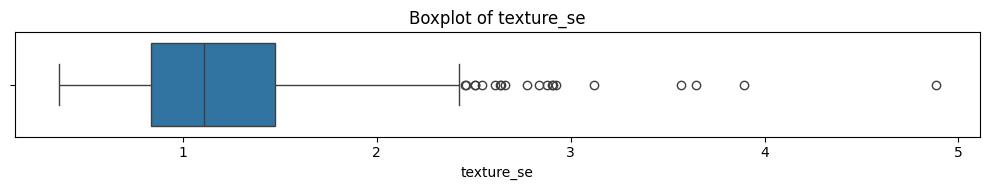

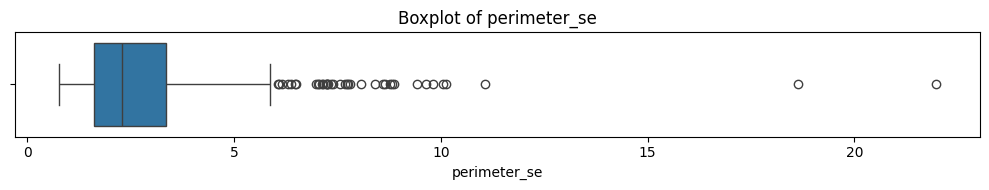

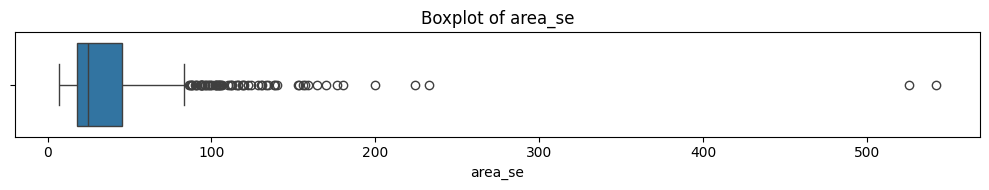

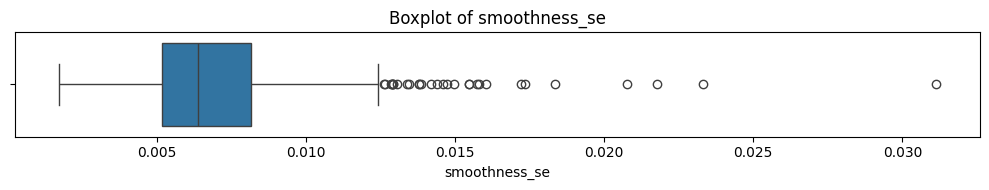

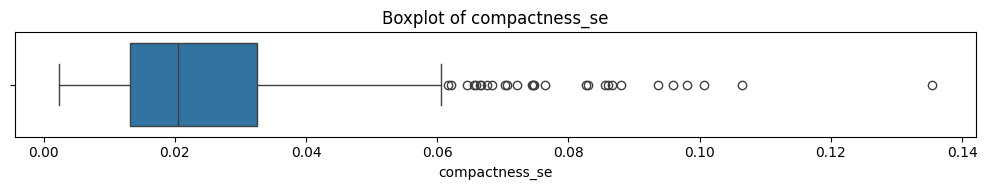

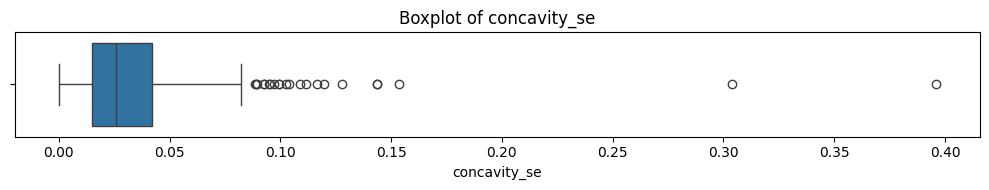

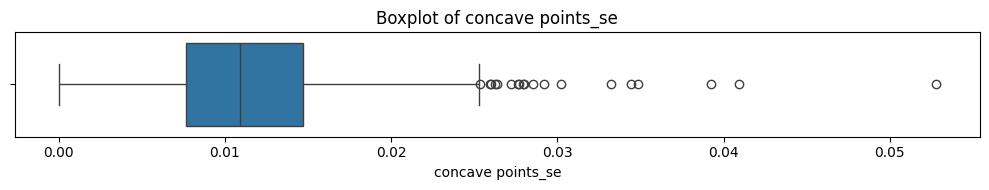

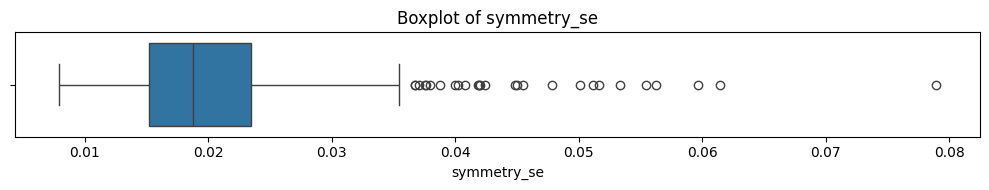

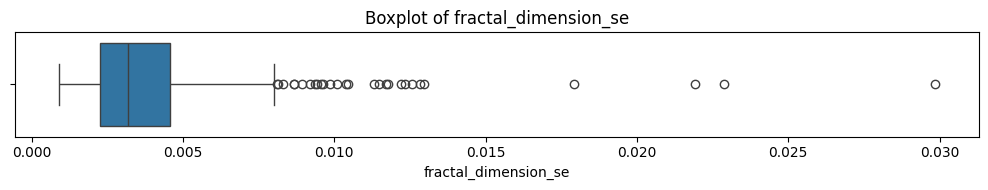

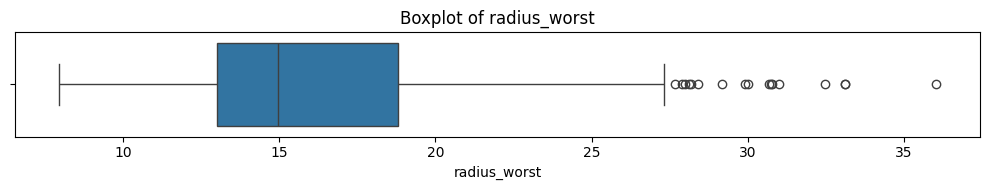

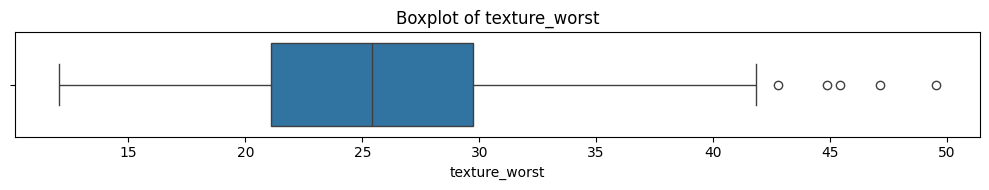

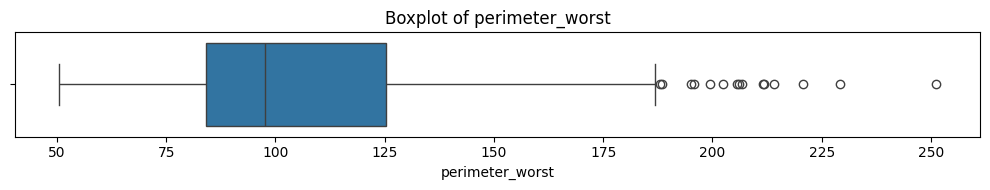

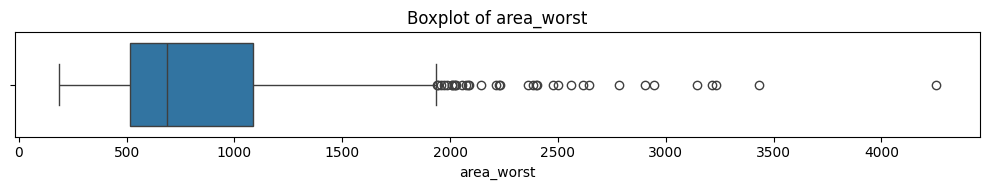

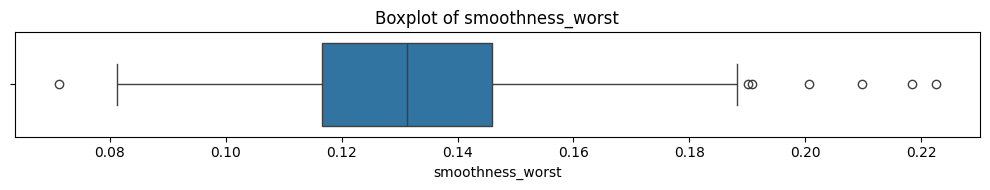

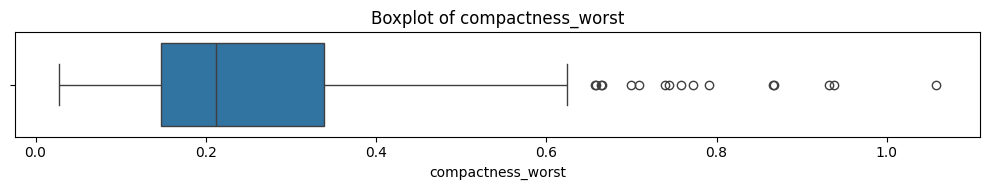

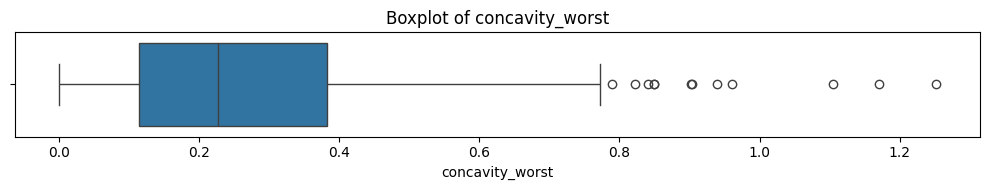

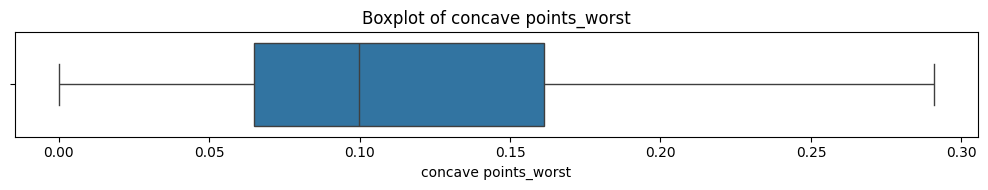

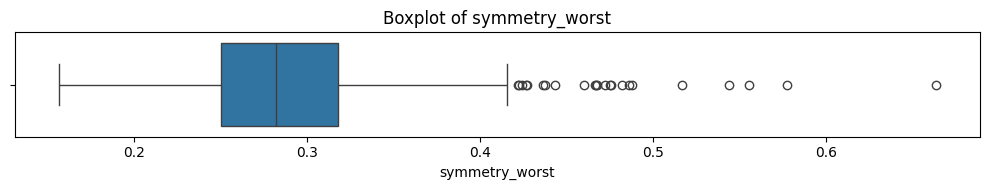

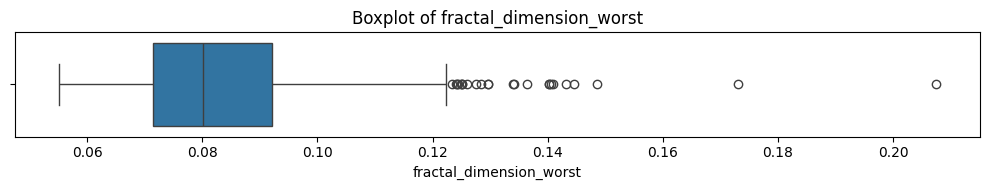

In [17]:
# Creating Boxplot for the continous columns in the dataset

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Unnamed: 32': # Exclude the column with all NaN values
        plt.figure(figsize=(10, 2)) # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [11]:
#Outliers removal using Z score

from scipy import stats
X = df.select_dtypes(include=['float64', 'int64'])
y = df['diagnosis']
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]
print(f"Original number of samples: {len(X)}")
print(f"Number of samples after outlier removal: {len(X_filtered)}")

Original number of samples: 569
Number of samples after outlier removal: 487


In [28]:
# Select only 'radius_mean' and 'texture_mean' for visualization
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

In [29]:
# Features and label (using selected features and filtered data)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filter X and y based on the outlier removal results
X = X.loc[X_filtered.index]
y = y.loc[y_filtered.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (340, 2)
Shape of X_test_scaled: (147, 2)
Shape of y_train: (340,)
Shape of y_test: (147,)


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [30]:
# Train SVM with linear kernel on 2 features

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy (2 features): {acc_linear:.4f}")

Linear Kernel Accuracy (2 features): 0.8571


In [31]:
# Train SVM with RBF kernel on 2 features

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy (2 features): {acc_rbf:.4f}")

RBF Kernel Accuracy (2 features): 0.8980


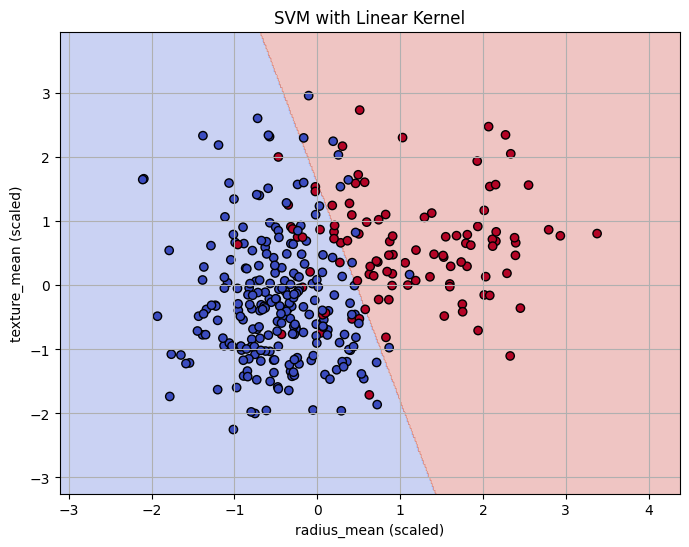

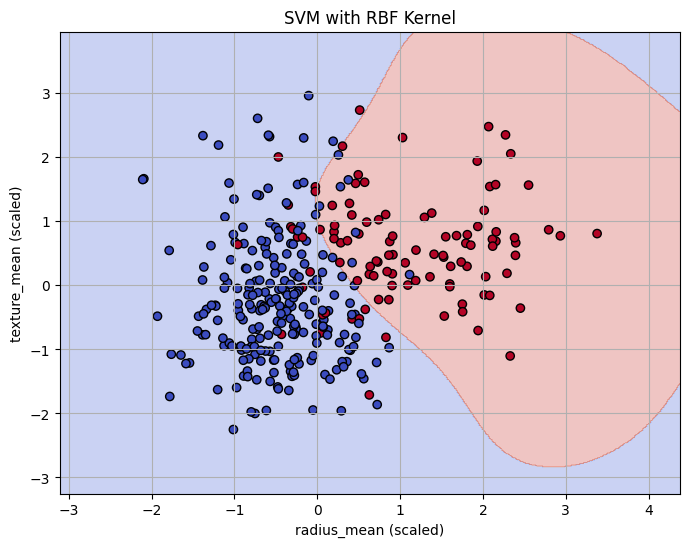

In [32]:
# Visualize Decision Boundary Using 2D Data

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('radius_mean (scaled)')
    plt.ylabel('texture_mean (scaled)')
    plt.grid(True)
    plt.show()


# Visualize linear kernel decision boundary
plot_decision_boundary(svm_linear, X_train_scaled, y_train, 'SVM with Linear Kernel')

# Visualize RBF kernel decision boundary
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, 'SVM with RBF Kernel')


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

In [38]:
# Tune Hyperparameters (C, gamma)
param_grid = [
    {'kernel': ['linear'],
     'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'],
     'C': [0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}
]
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters : {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best parameters : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV accuracy: 0.9176


In [41]:
# 5-fold cross-validation

cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Predict on cross-validation folds to get detailed metrics

y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train_scaled, y_train, cv=5)

# Print precision, recall, f1

print("Classification Report:\n")
print(classification_report(y_train, y_pred_cv, target_names=['Benign (0)', 'Malignant (1)']))

Cross-Validation Accuracy Scores: [0.92647059 0.83823529 0.92647059 0.92647059 0.97058824]
Mean CV Accuracy: 0.9176
Classification Report:

               precision    recall  f1-score   support

   Benign (0)       0.92      0.96      0.94       236
Malignant (1)       0.90      0.82      0.86       104

     accuracy                           0.92       340
    macro avg       0.91      0.89      0.90       340
 weighted avg       0.92      0.92      0.92       340

